In [ ]:
import matplotlib.pyplot as plt
import tqdm
from time import time

# Estructura de los datos.

Tenemos 3043 observaciones de dimensión 500. Estas características provienen de un análisis de componentes principales, pues se buscó reducir la dimensión.

# Datos del ejercicio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("base.csv")
print(df.head())
from sklearn.utils import shuffle
#df = shuffle(df)###El ajuste depende de este shuffle*****

   muestra         0         1         2         3         4         5  \
0        0 -0.017698 -0.018833 -0.005616 -0.000572 -0.005652 -0.018966   
1        1 -0.019763 -0.018925 -0.005570 -0.000452 -0.005316 -0.018045   
2        2 -0.020007 -0.020142 -0.005839 -0.000438 -0.005355 -0.018727   
3        3 -0.014178 -0.015676 -0.005112 -0.000345 -0.005809 -0.019237   
4        4 -0.020483 -0.020830 -0.005978 -0.000489 -0.005396 -0.019325   

          6         7         8  ...       491       492       493       494  \
0 -0.012661 -0.016314 -0.001750  ...  0.000706 -0.001257  0.001123 -0.001063   
1 -0.012203 -0.015462 -0.001681  ...  0.001495  0.000359 -0.000335 -0.000279   
2 -0.012396 -0.015604 -0.001798  ... -0.000068 -0.000303  0.000749 -0.000299   
3 -0.013223 -0.017674 -0.001145  ...  0.000358 -0.000483  0.000012 -0.000220   
4 -0.012630 -0.016130 -0.002057  ... -0.000909  0.000261  0.001696 -0.000984   

        495       496       497       498       499              etiqueta 

In [ ]:
print(df.shape)

(3043, 502)


In [ ]:
import numpy as np

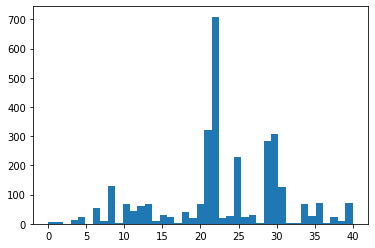

In [ ]:
ytags=df['etiqueta']
_,idx = np.unique(ytags,return_inverse=True)
plt.hist(idx,bins=len(_))
plt.show()#Mala representatividad de clases.

# Definición del modelo.

In [ ]:
import tensorflow as tf
import keras
import pandas as pd
from keras import layers
from keras import models

Se considera un modelo 2 dos capas ocultas de tipo densas. Una con 256 nodos y la otra con 64, cada una con función de activación de tipo "relu".

Para la clasificación, se utiliza una función de pérdida de tipo categórica-crossentropy, con una capa de salida de 41 clases, una para cada etiqueta única definida en los datos.

Se da un número fijo de epocas (20) y un batch-size fijo (10)

#k-Cross-validation. 

Consideraremos distintos datos de entrenamiento/validación a fin de promediar el desempeño obtenido.

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,roc_auc_score

from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

In [ ]:
input_shape=500
def RN(X_train_set,Y_train_set,X_val_set,Y_val_set):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_shape,), name='Input_Layer'))#Obligatoria
    model.add(layers.Dense(512, activation='relu'))# Numero de capas ocultas: Opcional
    model.add(layers.Dense(64, activation='relu'))# Numero de neuronas en cada capa: Opcional
    model.add(layers.Dense(41, activation='Softmax', name='Output_Layer'))#Obligatoria
    #model.summary()
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    model.fit(x = X_train_set, 
            y = Y_train_set,##Cuando haya otra base, se modifica ese 200
            batch_size=10,
            epochs=20,
            verbose=0,shuffle=True)
    test_predicted_labels_raw = model.predict(X_val_set)
    test_true_labels      = np.argmax(Y_val_set,axis=1)
    test_predicted_labels = np.argmax(test_predicted_labels_raw,axis=1)
    accuracy = accuracy_score(test_true_labels,test_predicted_labels)
    precision = precision_score(test_true_labels,test_predicted_labels,average='weighted',zero_division=1)
    recall = recall_score(test_true_labels,test_predicted_labels,average='weighted',zero_division=1)
    f1 = f1_score(test_true_labels,test_predicted_labels,average='weighted')
    return(accuracy,precision,recall,f1)


In [ ]:
from keras.utils import to_categorical
K=20# se consideran 20 subconjuntos aleatorios de entrenamiento.
metrics=np.zeros((K,4))
for k in range(K):
    df=shuffle(df)##Este hace todo el truco
    ytags=df['etiqueta']
    X_total=df.drop(columns=['muestra','etiqueta'])
    _,idx = np.unique(ytags,return_inverse=True)
    Y_total=to_categorical(idx)
    train_perc=int(0.80*len(X_total))
    X_train=X_total[0:train_perc]
    Y_train=Y_total[0:train_perc]
    X_val=X_total[train_perc:]
    Y_val=Y_total[train_perc:]
    metrics[k]=RN(X_train_set=X_train,Y_train_set=Y_train,X_val_set=X_val,Y_val_set=Y_val)
    if(k%5==0):
        print(k)

20/20 [==============================] - 0s 3ms/step
0
20/20 [==============================] - 0s 2ms/step
5
20/20 [==============================] - 0s 3ms/step
10
20/20 [==============================] - 0s 3ms/step
15
20/20 [==============================] - 0s 3ms/step
[[0.95073892 0.96636204 0.95073892 0.95191927]
 [0.9589491  0.96406609 0.9589491  0.95645611]
 [0.94417077 0.95669808 0.94417077 0.94112057]
 [0.9589491  0.9639297  0.9589491  0.95822558]
 [0.94417077 0.95126595 0.94417077 0.9390454 ]
 [0.95402299 0.96710023 0.95402299 0.95715921]
 [0.96223317 0.9682486  0.96223317 0.95921395]
 [0.96059113 0.96604245 0.96059113 0.95494177]
 [0.95402299 0.96226605 0.95402299 0.94971314]
 [0.9589491  0.96509762 0.9589491  0.95634197]
 [0.95238095 0.96021089 0.95238095 0.95342144]
 [0.95402299 0.95645573 0.95402299 0.94996408]
 [0.94252874 0.94807754 0.94252874 0.94076131]
 [0.95730706 0.96809998 0.95730706 0.95579866]
 [0.95566502 0.96638155 0.95566502 0.95199824]
 [0.95730706 0.96368

#Métricas de desempeño.

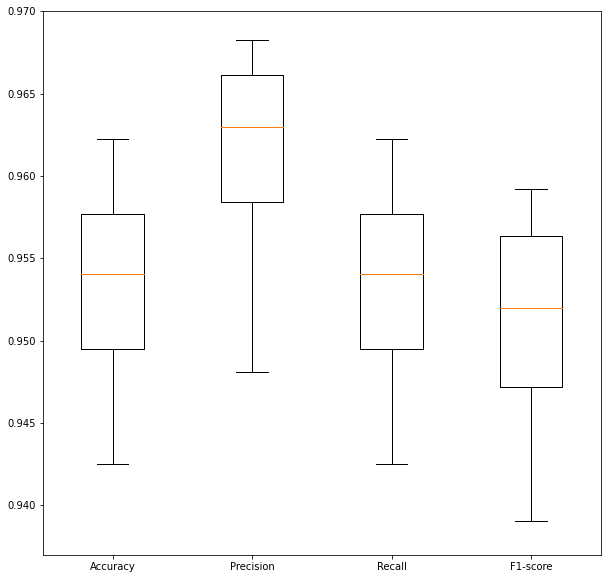

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(metrics[:,0:],labels=['Accuracy','Precision','Recall','F1-score'])
plt.ylim((0.937,0.97))
plt.show()

## Promedios

In [ ]:
from tabulate import tabulate
print(tabulate([[str(np.round(metrics.mean(0).tolist()[i],4)) for i in range(4)]], headers=["Accuracy", "Precision","Recall", "F1-score"]))

  Accuracy    Precision    Recall    F1-score
----------  -----------  --------  ----------
    0.9529       0.9612    0.9529      0.9508


Recordemos que se trata de un problema multiclase, por lo que se puede decir que tenemos un muy buen desempeño en la clasificación.